<a href="https://colab.research.google.com/github/Mir-Safwan-Marzouq/Deep-Learning/blob/main/7_Different%20Gradient%20Descent%20/Batch_Gradient_Descent_Stochastic_Gradient_Descent_Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/homeprices_banglore.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


Scaling

In [4]:
from sklearn import preprocessing

#using two different objects for min max scalar my x is area and no of bedrooms y is price 

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))

In [5]:
df.drop('price', axis = 'columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [7]:
scaled_X #minmax scaling will convert them into range of 0 to 1

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [10]:
df.shape[0]

20

In [11]:
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

**Implement Batch Gradient Descent**

In [16]:
w = np.ones(shape = (2))
scaled_X.T #rows got converted into columns 

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [15]:
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [21]:
# find out w1, w2 and bias

def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b  # w1* area +w2 * bedrooms

    w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted))
    b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    # cost = mean square error

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list


In [22]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0]), 500)

In [23]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'cost')

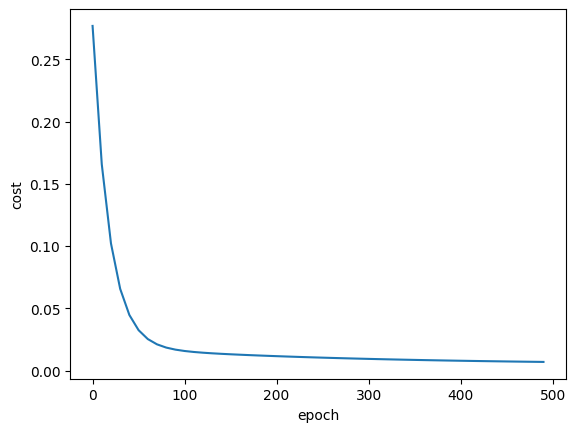

In [25]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

Prediction Function

In [37]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area,bedrooms]])[0] # expects a data frame or a 2D array, its a 2d array and I want to get the first dimension

  scaled_price = w[0] * scaled_X[0] + w[1]*scaled_X[1] +b

  return sy.inverse_transform([[scaled_price]])
  pass


# when I use prediction function I don't want to give scaled values as input rather I would give actual values

In [38]:
sx.transform([[2600, 4]])
sy.inverse_transform([[1,0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[167.,  32.]])

In [41]:
predict(2600, 4, w, b)[0][0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [42]:
predict(1000, 2, w, b)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

In [43]:
predict(1500, 3, w, b)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[69.47860786]])

### **Stochastic Gradient Decent**

In [45]:
import random
random.randint(0,6)

1

In [46]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  
  w = np.ones(shape = (number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y - y_predicted)

    if i%100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [47]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0]), 10000)

In [48]:
w_sgd, b_sgd, cost_sgd

(array([0.70595351, 0.67241571]), -0.22509394390399864, 0.002788301146706463)

In [49]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'Cost')

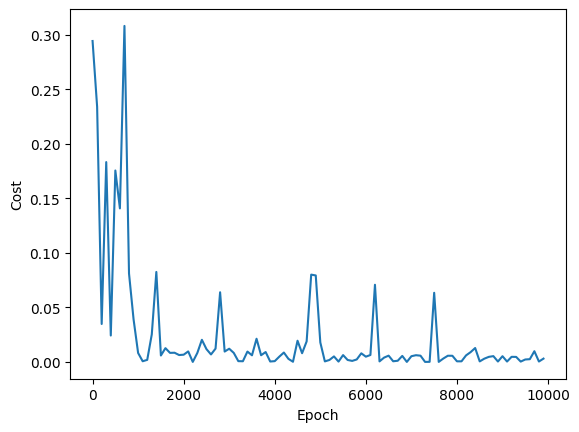

In [52]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [53]:
predict(2600, 4, w_sgd, b_sgd)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.84844424]])